In [2]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


In [3]:
e2e = {}
rg = {}
lengths = [51,101,151,251,351]
mean_rg = []
mean_e2e = []

for l in lengths:
    e2e[l] = np.loadtxt(f'data/frc_a_{l}_e2e.csv')
    rg[l] = np.loadtxt(f'data/frc_a_{l}_rg.csv')
    mean_rg.append(np.mean(rg[l]))
    mean_e2e.append(np.mean(e2e[l]))

In [4]:
np.log10(lengths)

array([1.70757018, 2.00432137, 2.17897695, 2.39967372, 2.54530712])

In [5]:
np.polyfit(np.log10(lengths), np.log10(mean_rg),1)

array([0.51086137, 0.39115198])

In [6]:
np.polyfit(np.log10(lengths), np.log10(mean_e2e),1)

array([0.51399299, 0.74956398])

meta NOT subset; don't know how to subset; dropped


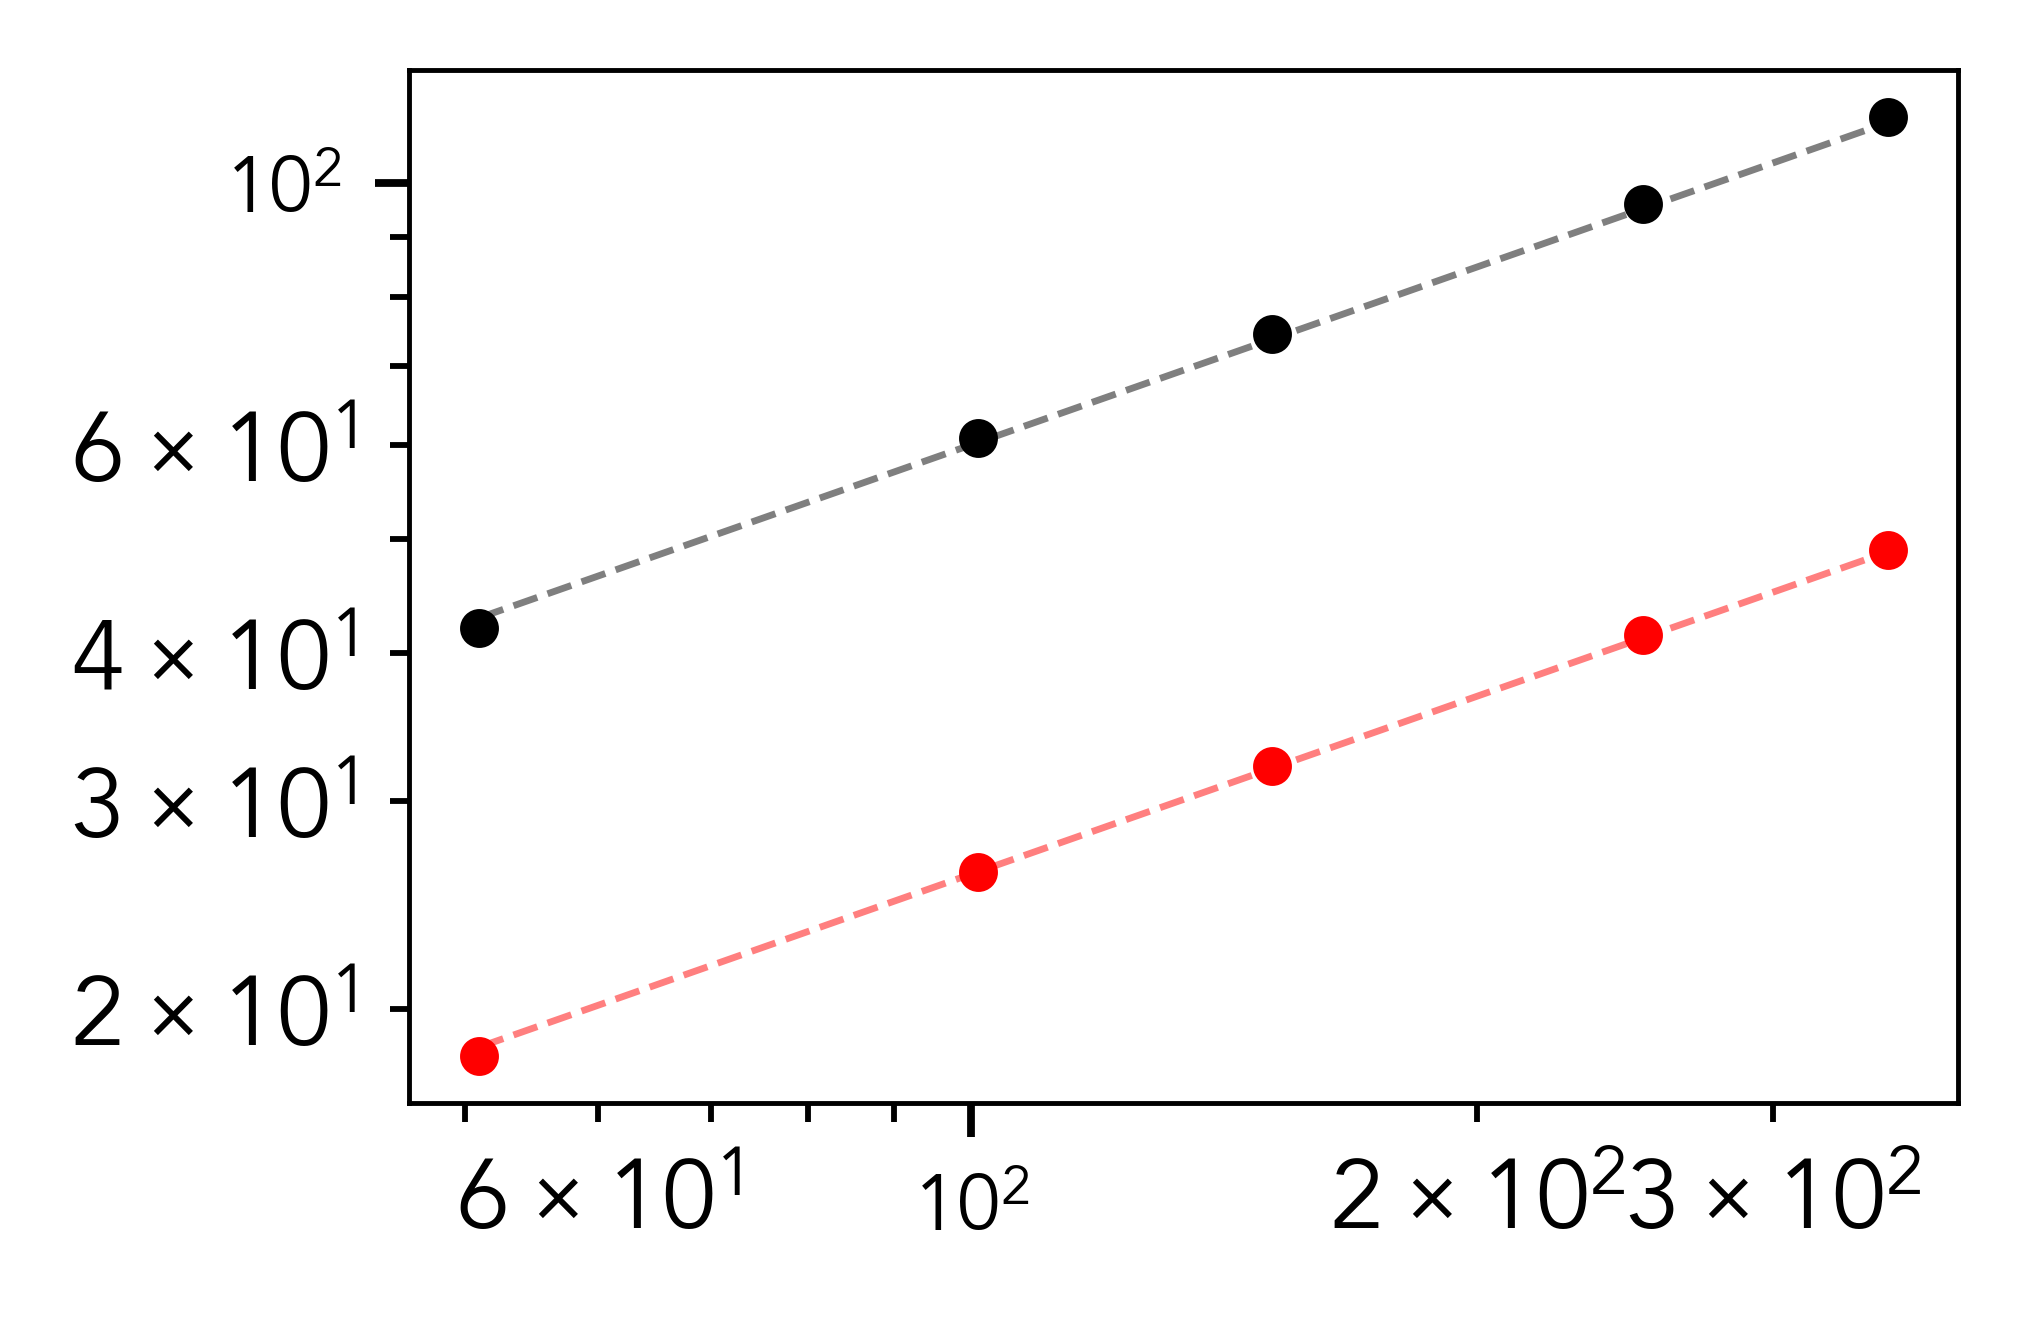

In [37]:
figure(None, (3,2), dpi=350)
plt.loglog(lengths, mean_rg,'.', color='r')
plt.loglog(lengths, mean_e2e,'.', color='k')
plt.plot(lengths, np.power(np.array(lengths),0.50)*2.6, '--',color='r', alpha=0.5, linewidth=0.7)
plt.plot(lengths, np.power(np.array(lengths),0.50)*6., '--',color='k', alpha=0.5, linewidth=0.7)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#plt.ylabel(r'$\langle \langle r_{(i,j)} \rangle \rangle$  ($\rm\AA$)', fontsize=8)
#plt.xlabel(r'$|i-j|$ (residues)', fontsize=8)

plt.tight_layout()
plt.savefig('panel_1D.pdf')
